# Clase 1: Análisis de acciones

[Juan Diego Sánchez Torres](https://www.researchgate.net/profile/Juan_Diego_Sanchez_Torres), 

*Profesor*, [MAF ITESO](http://maf.iteso.mx/web/general/detalle?group_id=5858156)

+ Departamento de Matemáticas y Física
+ dsanchez@iteso.mx
+ Tel. 3669-34-34 Ext. 3069
+ Oficina: Cubículo 4, Edificio J, 2do piso

# 1. El uso de Pandas para bajar datos de Yahoo! Finance

En primer lugar, para poder bajar precios de Yahoo, es necesario cargar algunos paquetes de Python. En este caso, el paquete principal será Pandas. También, se usarán el Scipy y el Numpy para las matemáticas necesarias y, el Matplotlib para hacer gráficos de las series de datos.

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

Una vez cargados los paquetes, es necesario definir los tickers de las acciones que se usarán, la fuente de descarga (Yahoo en este caso, pero también se puede desde Google) y las fechas de interés. Con esto, la función *DataReader* del paquete *pandas_datareader* bajará los precios solicitados.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte. El siguiente comando instala el paquete en Anaconda:
*conda install -c conda-forge pandas-datareader *

In [2]:
#Descargar datos de Yahoo! finance
#Tickers 
tickers = ['AA','AAPL','MSFT', '^GSPC']
# Fuente
data_source = 'yahoo'
# Fechas: desde 01/01/2014 hasta 12/31/2016.
start_date = '2014-01-01'
end_date = '2016-12-31'
# Usar el pandas data reader. El comando sort_index ordena los datos por fechas
assets = (web.DataReader(tickers, data_source, start_date, end_date)).sort_index('major_axis')

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

Como se puede notar, en este caso se consideran tres activos (Alcoa, Apple y Microsoft) y, el índice S&P500. Todos almacenados en la variable *assets*, que tiene la siguiente estructura:

In [3]:
assets

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 756 (major_axis) x 4 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2014-01-02 00:00:00 to 2016-12-30 00:00:00
Minor_axis axis: AA to ^GSPC

El objeto *assets* tiene tres características: *items*, *major_axis* y *minor_axis*. Con estos, se pueden encontrar todos los registros almacenados.

In [4]:
assets.items

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [5]:
assets.minor_axis

Index(['AA', 'AAPL', 'MSFT', '^GSPC'], dtype='object')

In [6]:
assets.major_axis

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None)

De esta forma, es ordenar y acceder a los datos de una forma simple e intuitiva. Por ejemplo: los precios de cierre de Microsoft.

In [7]:
assets['Adj Close']['MSFT']

Date
2014-01-02    33.870
2014-01-03    33.642
2014-01-06    32.931
2014-01-07    33.186
2014-01-08    32.594
               ...  
2016-12-23    62.501
2016-12-27    62.540
2016-12-28    62.254
2016-12-29    62.165
2016-12-30    61.414
Name: MSFT, Length: 756, dtype: float64

O, los precios de apertura de Apple

In [8]:
assets['Open']['AAPL']

Date
2014-01-02     79.383
2014-01-03     78.980
2014-01-06     76.779
2014-01-07     77.760
2014-01-08     76.973
               ...   
2016-12-23    115.590
2016-12-27    116.520
2016-12-28    117.520
2016-12-29    116.450
2016-12-30    116.650
Name: AAPL, Length: 756, dtype: float64

También, los precios de cierre en la fecha *2014-01-14*

In [9]:
assets.major_xs('2014-01-14')['Close']

AA         24.799
AAPL       78.056
MSFT       35.780
^GSPC    1838.880
Name: Close, dtype: float64

O, finalmente, los valores del S&P500

In [10]:
assets.minor_xs('^GSPC')

            Adj Close    Close     High      Low     Open     Volume
Date                                                                
2014-01-02    1831.98  1831.98  1845.86  1827.74  1845.86  3.081e+09
2014-01-03    1831.37  1831.37  1838.24  1829.13  1833.21  2.774e+09
2014-01-06    1826.77  1826.77  1837.16  1823.73  1832.31  3.295e+09
2014-01-07    1837.88  1837.88  1840.10  1828.71  1828.71  3.512e+09
2014-01-08    1837.49  1837.49  1840.02  1831.40  1837.90  3.652e+09
...               ...      ...      ...      ...      ...        ...
2016-12-23    2263.79  2263.79  2263.79  2258.84  2260.25  2.021e+09
2016-12-27    2268.88  2268.88  2273.82  2266.15  2266.23  1.987e+09
2016-12-28    2249.92  2249.92  2271.31  2249.11  2270.23  2.392e+09
2016-12-29    2249.26  2249.26  2254.51  2244.56  2249.50  2.336e+09
2016-12-30    2238.83  2238.83  2253.58  2233.62  2251.61  2.671e+09

[756 rows x 6 columns]

De donde, se pueden seleccionar los precios de cierre y ajustados en el cierre

In [11]:
assets.minor_xs('^GSPC')[['Close', 'Adj Close']]

              Close  Adj Close
Date                          
2014-01-02  1831.98    1831.98
2014-01-03  1831.37    1831.37
2014-01-06  1826.77    1826.77
2014-01-07  1837.88    1837.88
2014-01-08  1837.49    1837.49
...             ...        ...
2016-12-23  2263.79    2263.79
2016-12-27  2268.88    2268.88
2016-12-28  2249.92    2249.92
2016-12-29  2249.26    2249.26
2016-12-30  2238.83    2238.83

[756 rows x 2 columns]

# 2. Gráficos de las series de datos

En primer lugar, se toma como ejemplo la serie de precios de cierre de Microsoft, así como el volumen de transacciones.

In [12]:
msftA=assets['Adj Close']['MSFT']
msftV=assets['Volume']['MSFT']
msftA

Date
2014-01-02    33.870
2014-01-03    33.642
2014-01-06    32.931
2014-01-07    33.186
2014-01-08    32.594
               ...  
2016-12-23    62.501
2016-12-27    62.540
2016-12-28    62.254
2016-12-29    62.165
2016-12-30    61.414
Name: MSFT, Length: 756, dtype: float64

El gráfico de esta serie se obtiene de forma simple mediante el siguiente comando:

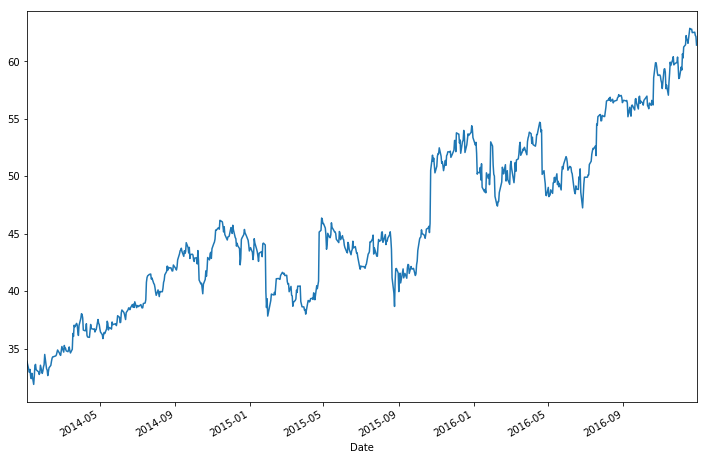

In [13]:
msftA.plot(figsize=(12,8));

De forma similar, se grafica la serie de volúmenes de transacción

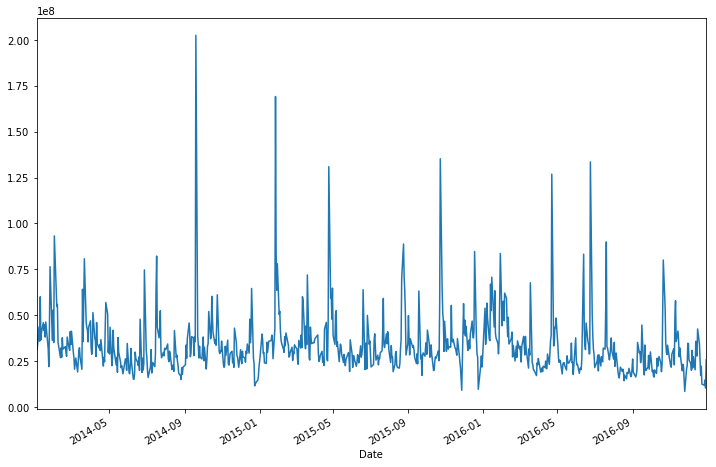

In [14]:
msftV.plot(figsize=(12,8));

Un procedimiento análogo puede aplicarse sobre todas las series de datos en forma simultánea. En primer lugar, se obtienen todos los precios de cierre:

In [15]:
allA=assets['Adj Close']
allA

                AA     AAPL    MSFT    ^GSPC
Date                                        
2014-01-02  24.486   73.523  33.870  1831.98
2014-01-03  24.579   71.908  33.642  1831.37
2014-01-06  24.486   72.300  32.931  1826.77
2014-01-07  24.509   71.783  33.186  1837.88
2014-01-08  25.183   72.237  32.594  1837.49
...            ...      ...     ...      ...
2016-12-23  29.710  115.088  62.501  2263.79
2016-12-27  29.650  115.819  62.540  2268.88
2016-12-28  29.430  115.325  62.254  2249.92
2016-12-29  28.890  115.296  62.165  2249.26
2016-12-30  28.080  114.397  61.414  2238.83

[756 rows x 4 columns]

Y una vez obtenidos, se grafican.

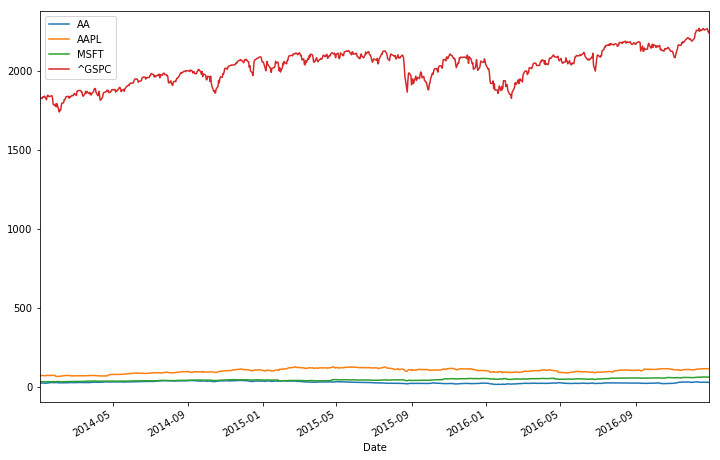

In [16]:
assets['Adj Close'].plot(figsize=(12,8));

En el gráfico anterior, es difícil observar el comportamiento de las acciones debido a su diferencia de magnitud con respecto al S&P500. Por esto, se seleccionan unicamente las series de tiempo de los precios de las acciones.

In [17]:
allassetsA=assets['Adj Close'][['AA', 'AAPL', 'MSFT']]

Luego, se dibujan de forma conjunta.

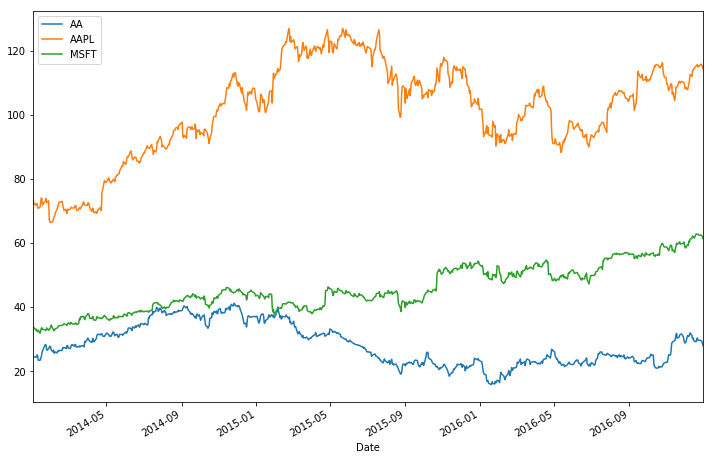

In [18]:
allassetsA.plot(figsize=(12,8));

Usualmente, es conveniente graficar al precio de cierre de una acción en conjunto con si volumen de transacciones. El siguiente es un ejemplo de esta clase de graficas para el caso de Microsoft.

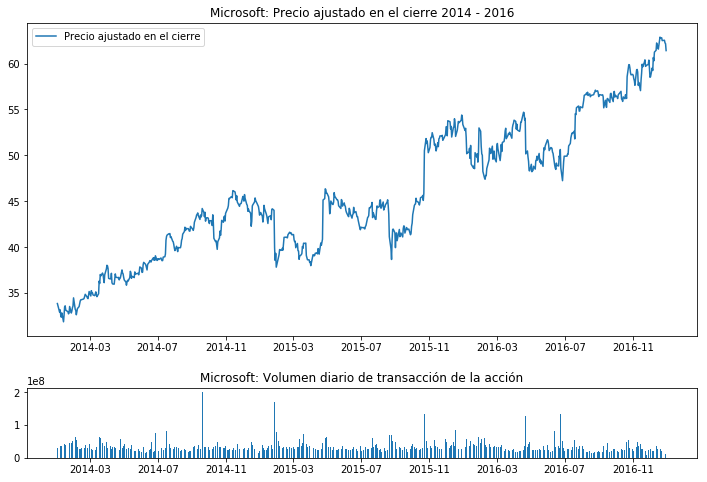

In [19]:
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(msftA.index, msftA, label='Precio ajustado en el cierre')
plt.title('Microsoft: Precio ajustado en el cierre 2014 - 2016')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV)
plt.title('Microsoft: Volumen diario de transacción de la acción')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

Otro procedimiento que se efectúa con freciencia es el cálculo de promedios y desviaciones móviles para la serie de precios. Los promedios móviles se calculan mediante:

In [20]:
short_rollmean_msft = msftA.rolling(window=20).mean()
long_rollmean_msft = msftA.rolling(window=100).mean()

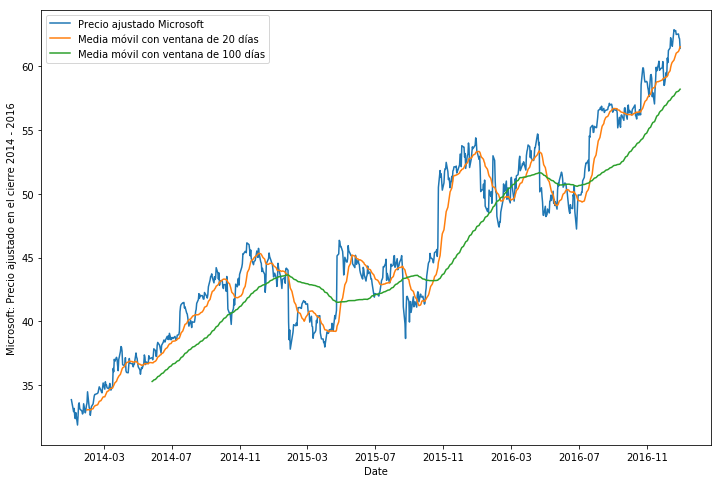

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msftA.index, msftA, label='Precio ajustado Microsoft')
ax.plot(short_rollmean_msft.index, short_rollmean_msft, label='Media móvil con ventana de 20 días')
ax.plot(long_rollmean_msft.index, long_rollmean_msft, label='Media móvil con ventana de 100 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Precio ajustado en el cierre 2014 - 2016')
ax.legend()

Y las desvaciones móviles, con la instrucción:

In [22]:
short_rollstd_msft = msftA.rolling(window=20).std()
long_rollstd_msft = msftA.rolling(window=100).std()

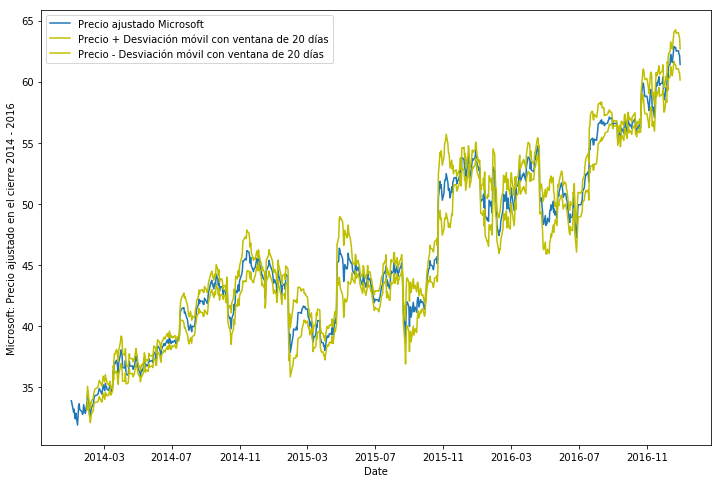

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msftA.index, msftA, label='Precio ajustado Microsoft')
ax.plot(short_rollstd_msft.index, msftA+short_rollstd_msft, color="y", label='Precio + Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_msft.index, msftA-short_rollstd_msft, color="y", label='Precio - Desviación móvil con ventana de 20 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Precio ajustado en el cierre 2014 - 2016')
ax.legend()

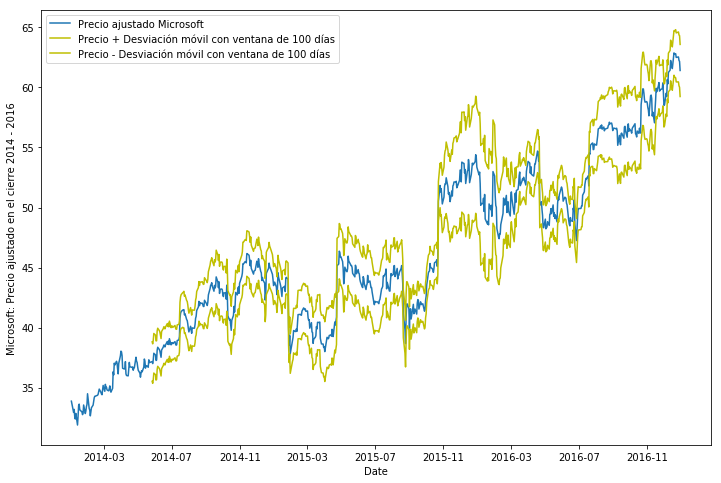

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msftA.index, msftA, label='Precio ajustado Microsoft')
ax.plot(long_rollstd_msft.index, msftA+long_rollstd_msft, color="y", label='Precio + Desviación móvil con ventana de 100 días')
ax.plot(long_rollstd_msft.index, msftA-long_rollstd_msft, color="y", label='Precio - Desviación móvil con ventana de 100 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Precio ajustado en el cierre 2014 - 2016')
ax.legend()

# 3. Cálculo de rendimientos

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, la fórmula anterior se puede implementar para todos los precios de cierre de manera simultánea mediante

In [25]:
R = ((allA - allA.shift(1))/allA)[1:]
R

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2014-01-03  3.784e-03 -2.246e-02 -6.773e-03 -3.331e-04
2014-01-06 -3.799e-03  5.423e-03 -2.159e-02 -2.518e-03
2014-01-07  9.488e-04 -7.203e-03  7.690e-03  6.045e-03
2014-01-08  2.678e-02  6.293e-03 -1.818e-02 -2.123e-04
2014-01-09 -1.310e-02 -1.294e-02 -6.473e-03  3.482e-04
...               ...        ...        ...        ...
2016-12-23 -1.346e-03  1.974e-03 -4.902e-03  1.250e-03
2016-12-27 -2.024e-03  6.311e-03  6.320e-04  2.243e-03
2016-12-28 -7.475e-03 -4.282e-03 -4.604e-03 -8.427e-03
2016-12-29 -1.869e-02 -2.570e-04 -1.431e-03 -2.934e-04
2016-12-30 -2.885e-02 -7.857e-03 -1.223e-02 -4.659e-03

[755 rows x 4 columns]

Otra manera de calcular el rendimiento simple es usando el comando de cambio porcentual.

In [26]:
(allA.pct_change())[1:]

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2014-01-03  3.799e-03 -2.197e-02 -6.728e-03 -3.330e-04
2014-01-06 -3.784e-03  5.453e-03 -2.113e-02 -2.512e-03
2014-01-07  9.497e-04 -7.151e-03  7.750e-03  6.082e-03
2014-01-08  2.751e-02  6.333e-03 -1.785e-02 -2.122e-04
2014-01-09 -1.293e-02 -1.277e-02 -6.431e-03  3.483e-04
...               ...        ...        ...        ...
2016-12-23 -1.345e-03  1.978e-03 -4.878e-03  1.252e-03
2016-12-27 -2.019e-03  6.351e-03  6.324e-04  2.248e-03
2016-12-28 -7.420e-03 -4.264e-03 -4.583e-03 -8.357e-03
2016-12-29 -1.835e-02 -2.570e-04 -1.429e-03 -2.933e-04
2016-12-30 -2.804e-02 -7.796e-03 -1.208e-02 -4.637e-03

[755 rows x 4 columns]

Una gráfica de los rendimientos se obtiene con el comando

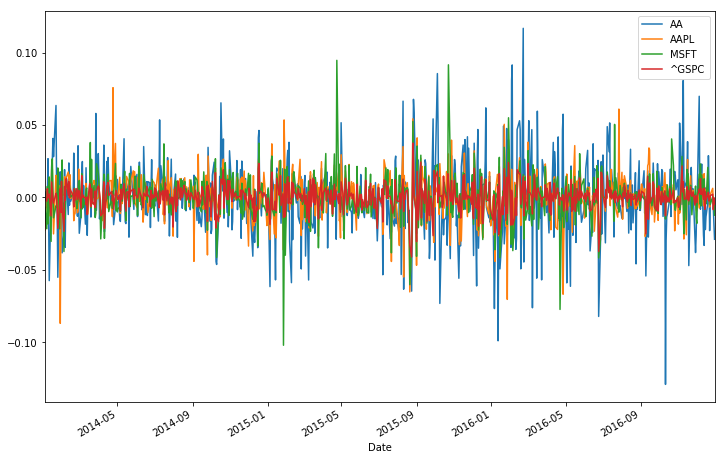

In [27]:
R.plot(figsize=(12,8));

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como
$$
r_t=\ln(1+R_t)
$$
donde $R_t$ es el rendimiento simple. Es fácil darse cuenta que $r_t=\ln\left(\frac{S_t}{S_{t-1}}\right)$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python.

In [28]:
r=np.log(1+R)
r

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2014-01-03  3.777e-03 -2.272e-02 -6.796e-03 -3.331e-04
2014-01-06 -3.806e-03  5.408e-03 -2.183e-02 -2.521e-03
2014-01-07  9.483e-04 -7.229e-03  7.661e-03  6.027e-03
2014-01-08  2.643e-02  6.273e-03 -1.834e-02 -2.123e-04
2014-01-09 -1.318e-02 -1.302e-02 -6.494e-03  3.481e-04
...               ...        ...        ...        ...
2016-12-23 -1.347e-03  1.972e-03 -4.914e-03  1.249e-03
2016-12-27 -2.026e-03  6.291e-03  6.318e-04  2.241e-03
2016-12-28 -7.503e-03 -4.291e-03 -4.614e-03 -8.463e-03
2016-12-29 -1.887e-02 -2.571e-04 -1.432e-03 -2.934e-04
2016-12-30 -2.927e-02 -7.888e-03 -1.231e-02 -4.670e-03

[755 rows x 4 columns]

Una gráfica de los rendimientos se obtiene con el comando

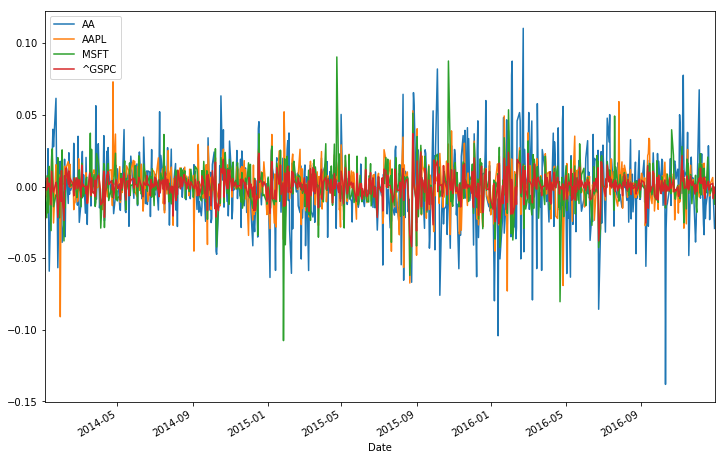

In [29]:
r.plot(figsize=(12,8))

In [30]:
R.describe()

              AA       AAPL       MSFT      ^GSPC
count  7.550e+02  7.550e+02  7.550e+02  7.550e+02
mean  -1.212e-04  4.710e-04  6.784e-04  2.299e-04
std    2.461e-02  1.515e-02  1.479e-02  8.469e-03
min   -1.290e-01 -8.687e-02 -1.020e-01 -4.103e-02
25%   -1.347e-02 -6.636e-03 -6.602e-03 -3.554e-03
50%    0.000e+00  7.544e-04  3.472e-04  2.881e-04
75%    1.224e-02  8.629e-03  7.710e-03  4.736e-03
max    1.167e-01  7.577e-02  9.463e-02  3.757e-02

In [31]:
r.describe()

              AA       AAPL       MSFT      ^GSPC
count  7.550e+02  7.550e+02  7.550e+02  7.550e+02
mean  -4.243e-04  3.559e-04  5.689e-04  1.939e-04
std    2.466e-02  1.520e-02  1.480e-02  8.483e-03
min   -1.381e-01 -9.088e-02 -1.076e-01 -4.190e-02
25%   -1.357e-02 -6.658e-03 -6.624e-03 -3.560e-03
50%    0.000e+00  7.542e-04  3.471e-04  2.880e-04
75%    1.217e-02  8.592e-03  7.680e-03  4.724e-03
max    1.104e-01  7.304e-02  9.042e-02  3.688e-02

In [32]:
Rmsft=(msftA.pct_change())[1:]
Rmsft

Date
2014-01-03   -6.728e-03
2014-01-06   -2.113e-02
2014-01-07    7.750e-03
2014-01-08   -1.785e-02
2014-01-09   -6.431e-03
                ...    
2016-12-23   -4.878e-03
2016-12-27    6.324e-04
2016-12-28   -4.583e-03
2016-12-29   -1.429e-03
2016-12-30   -1.208e-02
Name: MSFT, Length: 755, dtype: float64

In [33]:
short_rollmean_Rmsft = Rmsft.rolling(window=20).mean()
long_rollmean_Rmsft = Rmsft.rolling(window=100).mean()
short_rollstd_Rmsft = Rmsft.rolling(window=20).std()
long_rollstd_Rmsft = Rmsft.rolling(window=100).std()

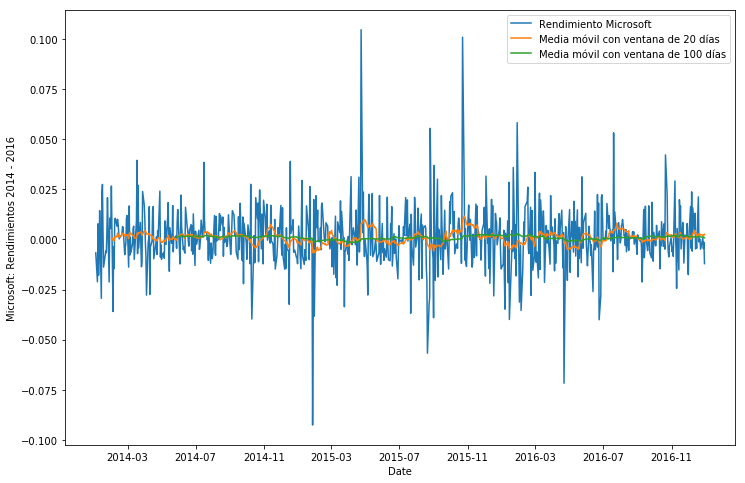

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label='Rendimiento Microsoft')
ax.plot(short_rollmean_Rmsft.index, short_rollmean_Rmsft, label='Media móvil con ventana de 20 días')
ax.plot(long_rollmean_Rmsft.index, long_rollmean_Rmsft, label='Media móvil con ventana de 100 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Rendimientos 2014 - 2016')
ax.legend()

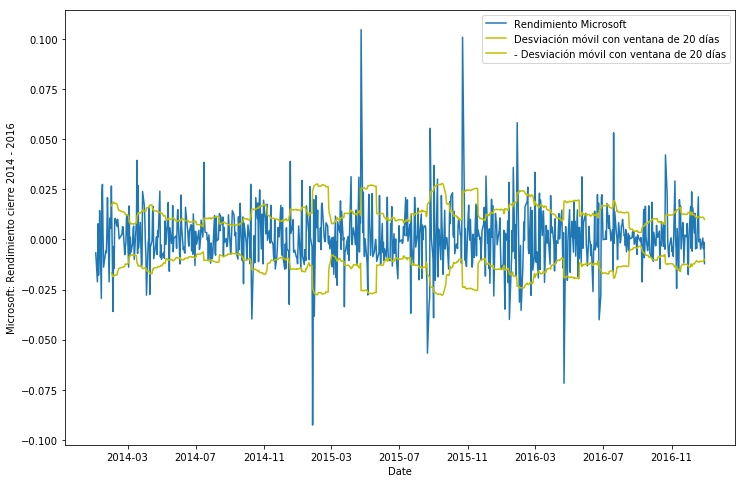

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label='Rendimiento Microsoft')
ax.plot(short_rollstd_Rmsft.index, short_rollstd_Rmsft, color="y", label='Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_Rmsft.index, -short_rollstd_Rmsft, color="y", label='- Desviación móvil con ventana de 20 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Rendimiento cierre 2014 - 2016')
ax.legend()

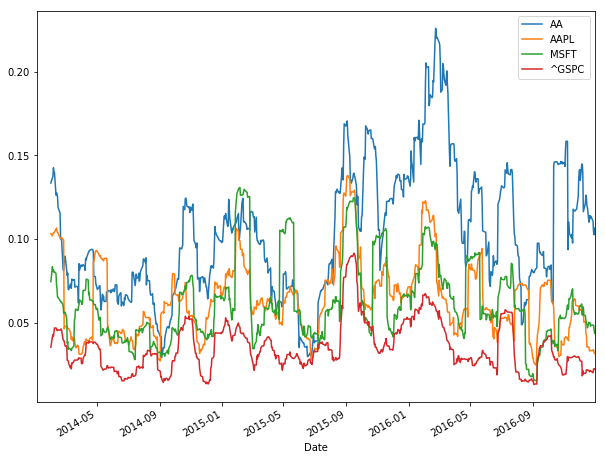

In [36]:
min_periods = 20
vol = R.rolling(window=min_periods).std()*np.sqrt(min_periods)
vol.plot(figsize=(10, 8))

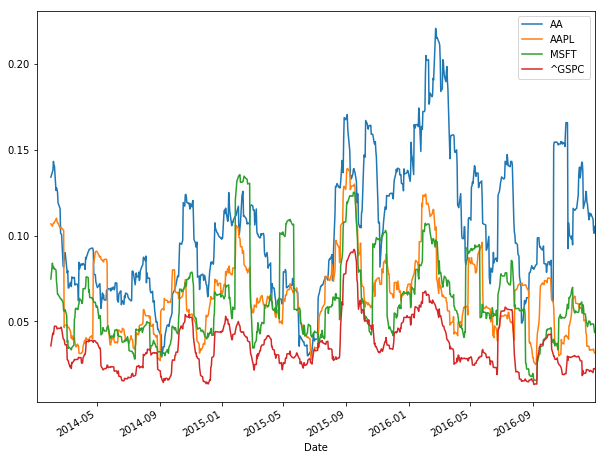

In [37]:
min_periods = 20
vol = r.rolling(window=min_periods).std()*np.sqrt(min_periods)
vol.plot(figsize=(10, 8))

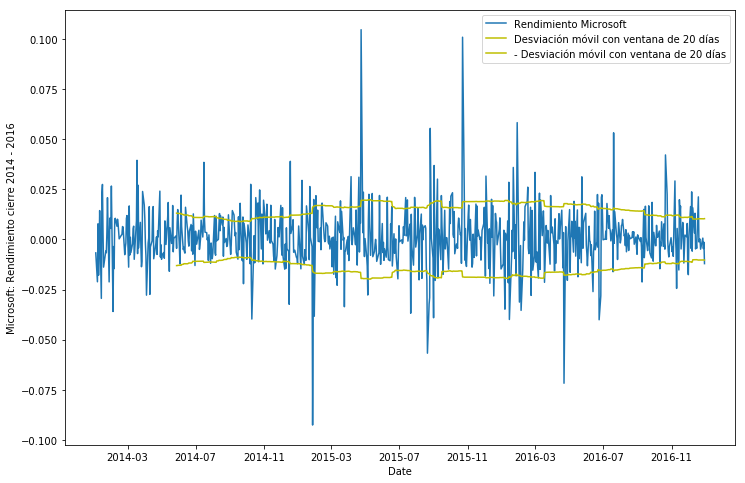

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label='Rendimiento Microsoft')
ax.plot(long_rollstd_Rmsft.index, long_rollstd_Rmsft, color="y", label='Desviación móvil con ventana de 20 días')
ax.plot(long_rollstd_Rmsft.index, -long_rollstd_Rmsft, color="y", label='- Desviación móvil con ventana de 20 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Rendimiento cierre 2014 - 2016')
ax.legend()

In [39]:
Rcum = (1 + R).cumprod()
Rcum

               AA   AAPL   MSFT  ^GSPC
Date                                  
2014-01-03  1.004  0.978  0.993  1.000
2014-01-06  1.000  0.983  0.972  0.997
2014-01-07  1.001  0.976  0.979  1.003
2014-01-08  1.028  0.982  0.961  1.003
2014-01-09  1.014  0.969  0.955  1.003
...           ...    ...    ...    ...
2016-12-23  0.769  1.316  1.564  1.171
2016-12-27  0.767  1.325  1.565  1.173
2016-12-28  0.762  1.319  1.558  1.163
2016-12-29  0.747  1.319  1.556  1.163
2016-12-30  0.726  1.308  1.537  1.158

[755 rows x 4 columns]

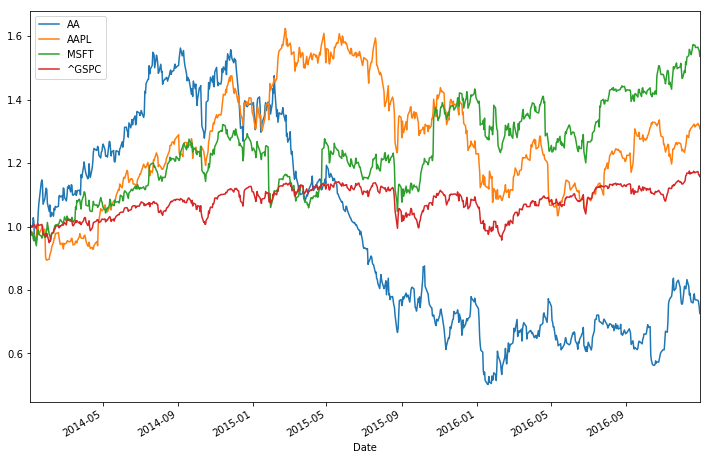

In [40]:
Rcum.plot(figsize=(12,8));

In [41]:
rcum=np.exp(r.cumsum())
rcum

               AA   AAPL   MSFT  ^GSPC
Date                                  
2014-01-03  1.004  0.978  0.993  1.000
2014-01-06  1.000  0.983  0.972  0.997
2014-01-07  1.001  0.976  0.979  1.003
2014-01-08  1.028  0.982  0.961  1.003
2014-01-09  1.014  0.969  0.955  1.003
...           ...    ...    ...    ...
2016-12-23  0.769  1.316  1.564  1.171
2016-12-27  0.767  1.325  1.565  1.173
2016-12-28  0.762  1.319  1.558  1.163
2016-12-29  0.747  1.319  1.556  1.163
2016-12-30  0.726  1.308  1.537  1.158

[755 rows x 4 columns]

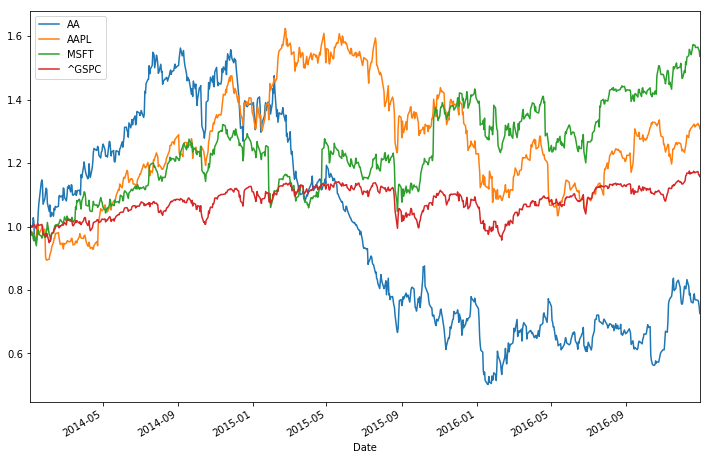

In [42]:
rcum.plot(figsize=(12,8));

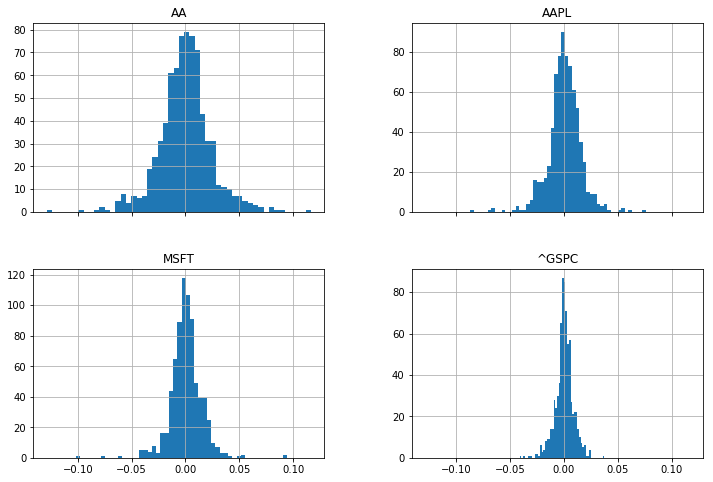

In [43]:
R.hist(bins=50, sharex=True, figsize=(12,8));

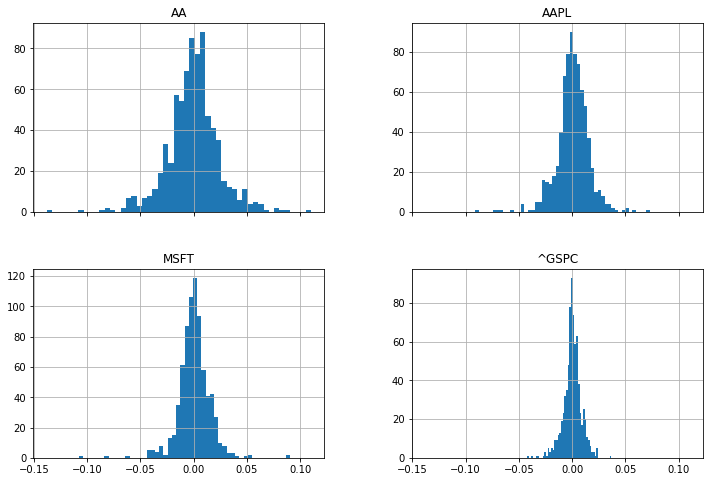

In [44]:
r.hist(bins=50, sharex=True, figsize=(12,8));

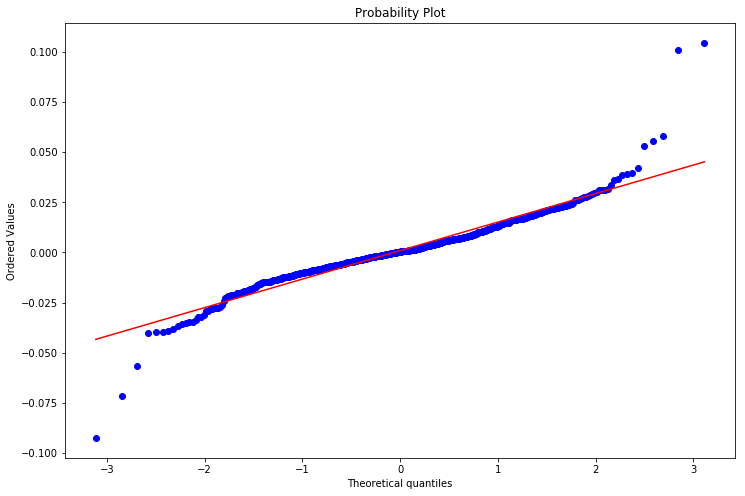

In [45]:
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(Rmsft, dist='norm', plot=ax)
plt.show();

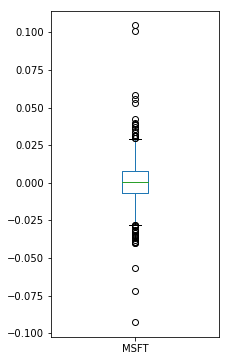

In [46]:
Rmsft.plot(kind='box', figsize=(3,6));

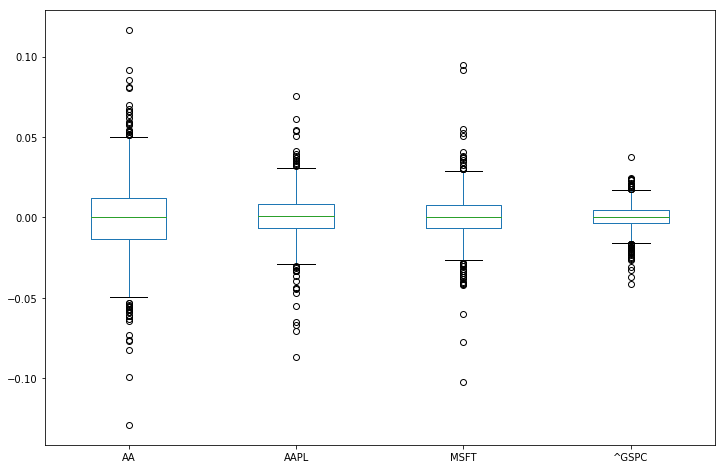

In [47]:
R.plot(kind='box', figsize=(12,8));

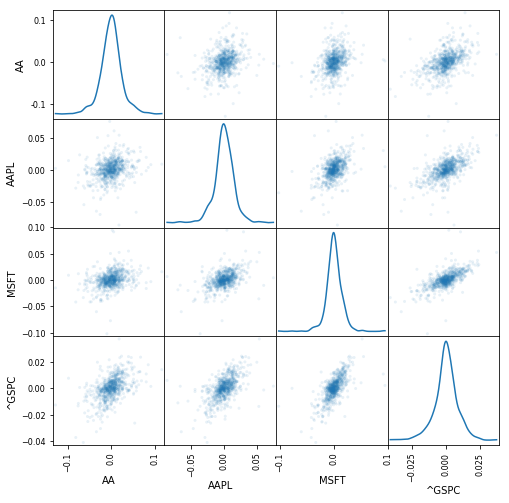

In [48]:
pd.plotting.scatter_matrix(R, diagonal='kde', alpha=0.1, figsize=(8,8));